# 10.4 Mutual Information

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mutual_info_score

## Mutual Information for Discrete Random Variable

In [6]:
categories = ['rec.autos', 'sci.med', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
vect = CountVectorizer(stop_words="english", token_pattern="[a-zA-Z]+")

vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z]+', tokenizer=None,
                vocabulary=None)

In [9]:
X = vect.fit_transform(newsgroups.data).toarray()
y = newsgroups.target

# Bag of Words
# num of documents = 1785
# num of words = 23805
print(X.shape) 
X

(1785, 23805)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
print(y.shape) # document class
y

(1785,)


array([1, 0, 0, ..., 0, 2, 1])

### 각각의 word가 모든 document에 대하여 갖는 상호정보량 계산

In [8]:
mi = np.array([mutual_info_score(X[:, i], y) for i in range(X.shape[0])])
mi # mutual info score

array([0.00310637, 0.01482766, 0.00061673, ..., 0.00077476, 0.00061673,
       0.00348708])

### 상호정보량 시각화

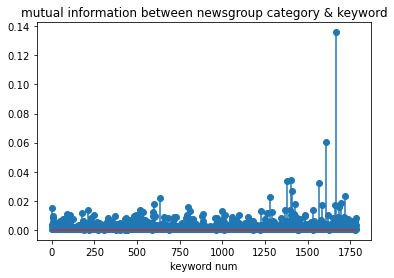

In [12]:
plt.stem(mi)
plt.title("mutual information between newsgroup category & keyword")
plt.xlabel("keyword num")
plt.show()

### 상호정보량이 큰 키워드 = 문서의 종류 (자동차, 의학, 야구) 분류에 효과적인 단어

In [5]:
# 가장 상호정보량이 큰 10개의 키워드는 다음과 같다.

inv_vocabulary = {v: k for k, v in vect.vocabulary_.items()}
idx = np.flip(np.argsort(mi))
[inv_vocabulary[idx[i]] for i in range(10)]

['baseball',
 'banks',
 'automotive',
 'auto',
 'ball',
 'autos',
 'batting',
 'atlanta',
 'alomar',
 'bat']

## ## Mutual Information for Continuous Random Variable

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/ipykernel_launcher.py:39: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


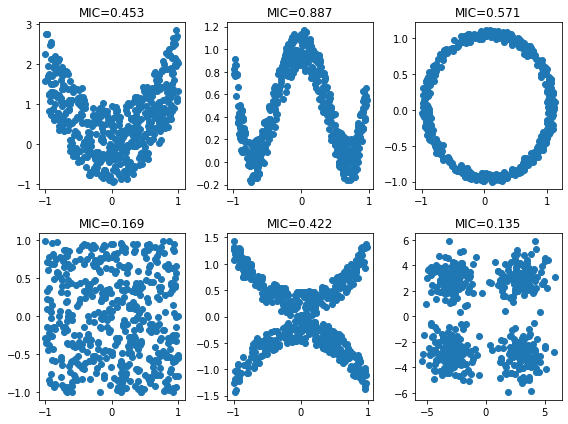

In [13]:
from minepy import MINE

mine = MINE()
n = 500

plt.figure(figsize=(8, 6))

plt.subplot(231)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-1, 1, n)
plt.scatter(x1, y1)
mine.compute_score(x1, y1)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(232)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + np.random.uniform(-1, 1, n)/5
plt.scatter(x2, y2)
mine.compute_score(x2, y2)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(233)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
mine.compute_score(x3, y3)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(234)
x4 = np.random.uniform(-1, 1, n)
y4 = np.random.uniform(-1, 1, n)
plt.scatter(x4, y4)
mine.compute_score(x4, y4)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(235)
x5 = np.random.uniform(-1, 1, n)
y5 = (x5**2 + np.random.uniform(0, 0.5, n)) * np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x5, y5)
mine.compute_score(x5, y5)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.subplot(236)
xy1 = np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], int(n/4))
xy2 = np.random.multivariate_normal([-3, 3], [[1, 0], [0, 1]], int(n/4))
xy3 = np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], int(n/4))
xy4 = np.random.multivariate_normal([3, -3], [[1, 0], [0, 1]], int(n/4))
xy = np.concatenate((xy1, xy2, xy3, xy4), axis=0)
x6 = xy[:, 0]
y6 = xy[:, 1]
plt.scatter(x6, y6)
mine.compute_score(x6, y6)
plt.title("MIC={0:0.3f}".format(mine.mic()))

plt.tight_layout()
plt.show()